# We're training Yolov3 using darknet
### We'll be applying our selected anchor point, we'll train the model and evaluate the result.
This is google-colab file, since we trained our the model using google colab for faters training and GPU utilization, we expect this file to be run only from colab enviroment.

In [14]:
import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 15873 (delta 13), reused 24 (delta 8), pack-reused 15833 (from 1)
Receiving objects: 100% (15873/15873), 14.50 MiB | 15.04 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.


In [4]:
# Let's modify our Makefile to utlize GPU
%cd darknet
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


Build darknet

In [5]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-variable-Wunused-variable]8;;]
  253 |                 int n = _write(client, outputbuf, outlen);
      |                     ^
./src/http_stream.cpp: In function ‘void se

# Our file structure
The IASR file structure is compose of 2 items and 1 directory:


1.   weights: This file will sote all the wight and checkpoint during the training.
2.   dataset.zip: our dataset compose of both our training and testing set.
3.   yolov3_custom.cfg: This contains the modified yolo config for the training.

In [6]:
!ls /content/gdrive/MyDrive/IASR

dataset.zip  weights  yolov3_custom.cfg


In [7]:
!unzip /content/gdrive/MyDrive/IASR/dataset.zip ".dataset/*" -d dataset/
!mv dataset/.dataset/* dataset/
!rm dataset/.dataset/

Archive:  /content/gdrive/MyDrive/IASR/dataset.zip
   creating: dataset/.dataset/
  inflating: dataset/.dataset/classes  
   creating: dataset/.dataset/french/
   creating: dataset/.dataset/french/test/
  inflating: dataset/.dataset/french/test/065c641fab4b4aedb618cd77caaccdca.jpg  
  inflating: dataset/.dataset/french/test/065c641fab4b4aedb618cd77caaccdca.txt  
  inflating: dataset/.dataset/french/test/06ca3f275e08475dbf67ce996652d138.jpg  
  inflating: dataset/.dataset/french/test/06ca3f275e08475dbf67ce996652d138.txt  
  inflating: dataset/.dataset/french/test/1b36cbfe9b5c446ca5fe1aa178410820.jpg  
  inflating: dataset/.dataset/french/test/1b36cbfe9b5c446ca5fe1aa178410820.txt  
  inflating: dataset/.dataset/french/test/221fc94918b043308a3889fee7b92191.jpg  
  inflating: dataset/.dataset/french/test/221fc94918b043308a3889fee7b92191.txt  
  inflating: dataset/.dataset/french/test/2ff68f43965a4e3f954b1c5d54ed62dc.jpg  
  inflating: dataset/.dataset/french/test/2ff68f43965a4e3f954b1c5d54

## Our dataset structure
Our dataset is compose of licence plat collected from 3 countries. We selected these 3 countries because they have similarities in their licence plate as we've mentioned in our project. The dataset strucutre have the following core files except the directory of our dataset:


1.   **train.txt**: The list of training image file path.
2.   **valid.txt**: The list of our validation image file path.
3.   **test.txt**: The list of our test image file path.
4.   **obj.names**: This contain our object name which is licence-plate
5.   **obj.data**: Darknet confg file which contain where the *train.txt*, *test.txt*, *# of class* and the folder to store checkpoints.



In [8]:
!ls dataset

classes  french  german  obj.data  obj.names  polish  test.txt	train.txt  valid.txt


## Copy our modified yolo configuration file to our colab storage.

In [9]:
!cp /content/gdrive/MyDrive/IASR/yolov3_custom.cfg yolov3-custom.cfg

# Training
This training is perfomed using darknet pre-trained weights, and we perfomed fine-tuning using our model and the pretrained weights as entry point. The using our data we trained it on Google golab T4 GPU for approximately 3.5 hours. moreover we also updated our yolov3-config to detect our anchor boxes.

In [11]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2024-12-16 15:10:00--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2024-12-16 15:10:00--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  20.8MB/s    in 11s     

2024-12-16 15:10:11 (14.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train dataset/obj.data yolov3-custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.673635), count: 2, class_loss = 0.022396, iou_loss = 0.059923, total_loss = 0.082319 
 total_bbox = 79641, rewritten_bbox = 0.000000 % 
1306/2000: loss=0.2 hours left=0.8
 1306: 0.210581, 0.191949 avg loss, 0.001000 rate, 3.842967 seconds, 83584 images, 0.844784 hours left
Loaded: 0.000094 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.795202), count: 1, class_loss = 0.127940, iou_loss = 0.008780, total_loss = 0.136720 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.924430), count: 1, class_loss = 0.016328, iou_loss = 0.002403, total_loss = 0.018731 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.578201), count: 4, class_loss = 0.210598, iou_loss = 0.275941, total_loss = 0.486540 
 total_bbox = 79647, rewritten_bbox = 0.000000 % 
v3 (mse los

## Training Result
After training several hours of training by fixing data preparation issues, and updating the subdivision the make the training faster we obtained the following result.
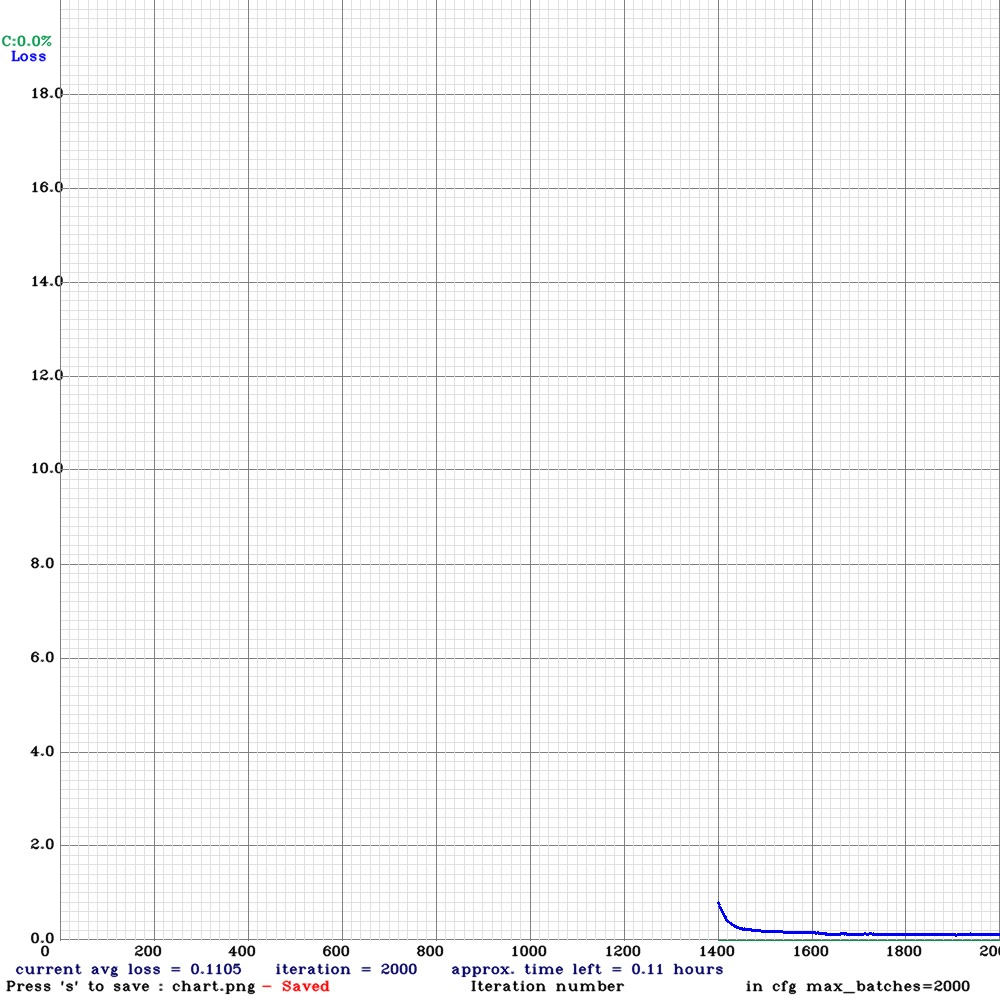

In [20]:

def displayImage(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## Training Continuation
Duing training our access to the colab was being revoked to counter resolve the issue, we continute our training from our last checkopoint

In [ ]:
# Continue training
!./darknet detector train dataset/obj.data yolov3-custom.cfg /content/gdrive/MyDrive/IASR/weights/yolov3-custom_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.001671, iou_loss = 0.000000, total_loss = 0.001671 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.839836), count: 4, class_loss = 0.033447, iou_loss = 0.058660, total_loss = 0.092107 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 32048, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.859714), count: 1, class_loss = 0.000039, iou_loss = 0.009351, total_loss = 0.009391 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.854790), count: 2, class_loss = 0.003119, iou_loss = 0.020315, total_loss = 0.023434 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00

# Testing
We evaluated our model, By analyzing the prediction perfomance on both the training set and testing set.

From evaluation of our model we can see that the model predicted with very nice result with mAP of 98.56%.


In [12]:
# Perfomance evaluation on our training sample.
!./darknet detector map dataset/obj.data yolov3-custom.cfg /content/gdrive/MyDrive/IASR/weights/yolov3-custom_final.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

# Inference
Since we've seen our detection accuracy and perfomance of our model, now we can visualize how well our model detect our plate by randomly selcting one testing value from our trainin dataset.

In [15]:
with open("./dataset/test.txt", "r") as f:
  test_data = f.read().strip().split('\n')

test_img_path = random.choice(test_data)

In [16]:
# Configure our yolo config to perfom detection only on 1 image

!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg

In [18]:
!./darknet detector test dataset/obj.data yolov3-custom.cfg /content/gdrive/MyDrive/IASR/weights/yolov3-custom_final.weights {test_img_path}  -thresh 0.3

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

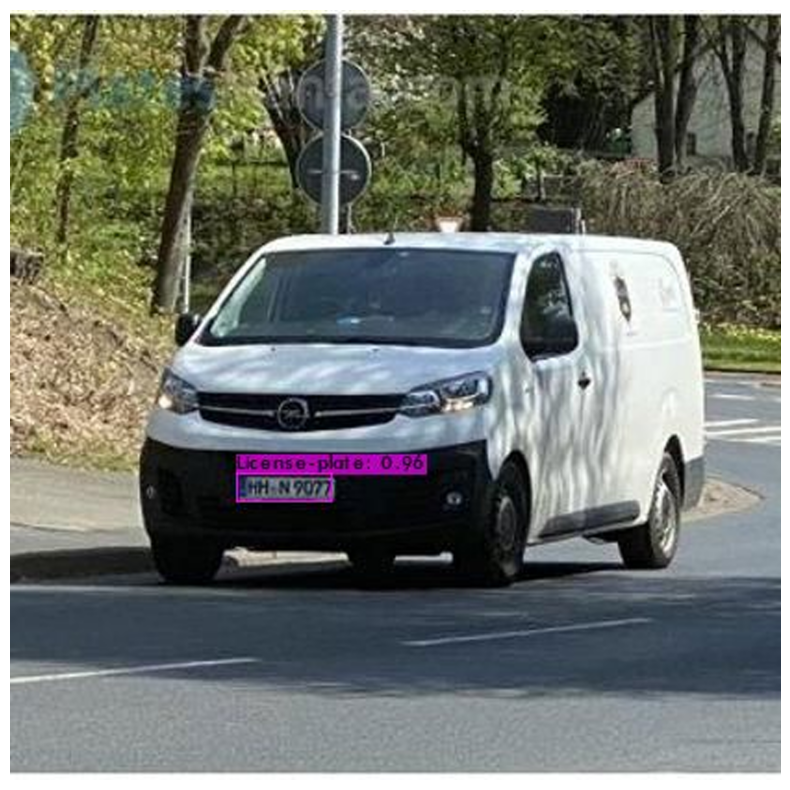

In [21]:
displayImage('predictions.jpg')